# COMP 579 Assignment 1

Deadline: Thursday, January 30th, 2024

Authors:
* Joey Koay: zhi.koay@mail.mcgill.ca (Group 12)
* Mihail Calitoiu: mihail.calitoiu@mail.mcgill.ca (Group 12)
* Ali Karami: ali.karami@mcgill.ca (TA)


In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import math


plt.rcParams["figure.figsize"]=10,5

## Q1 Simulator for Bernoulli Bandit

In [ ]:
class BernoulliBandit:
  """
  A class for Bernoulli multi-armed bandit.

  Attributes
  ----------
  num_arms : int
      The number of arms in the bernoulli bandit
  probs_arr : array of integer (size num_arms)
      The binomial distribution parameter p_k (probability of drawing 1) of each arm indexed from 0

  Methods
  -------
  sample(arm_index)
      Returns a reward sample of the binomial distribution indexed by the arm_index (return 0 with probability
      1-probs_arr[k] and 1 with probability probs_arr[k])
  """

  def __init__(self, num_arms, probs_arr):
    self.num_arms = num_arms #My Code
    self.probs_arr = probs_arr #My Code

  def sample(self, arm_index, time_step):
    #My Code
    #time_step does nothing here. Included as paramater to help support Q9
    return np.random.binomial(n=1, p=self.probs_arr[int(arm_index)])

In [ ]:
delta = 0.1
num_arms = 3
probs_arr = [0.5+delta, 0.5, 0.5-delta]
num_samples = 50

three_arm_bernoulli_bandit = BernoulliBandit(num_arms, probs_arr) #My Code
actions = range(num_arms)

action_rewards = []
for action in actions:
  # store 50 samples per action
  rewards = [three_arm_bernoulli_bandit.sample(action, None) for i in range(num_samples)] #My Code
  action_rewards.append(rewards)

### Graphs

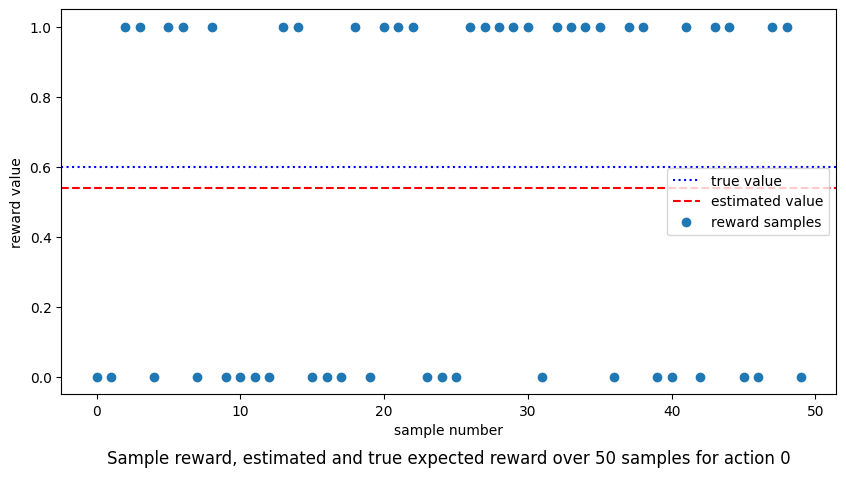

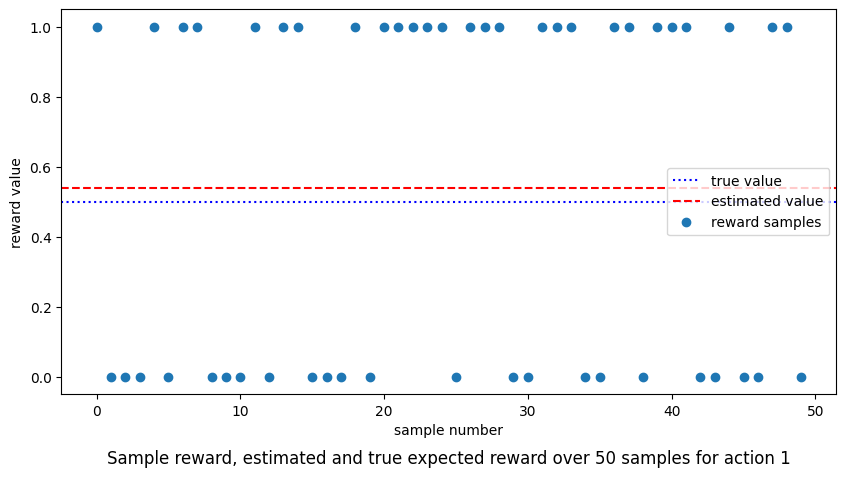

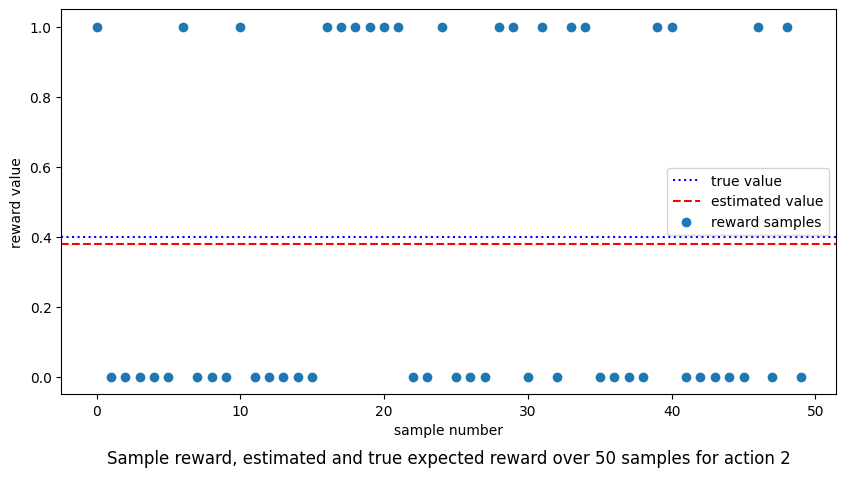

In [ ]:
for action in actions:
  fig, ax = plt.subplots()

  true_value = probs_arr[action] #My Code
  estimated_value = np.mean(np.array(action_rewards[action])) #My Code

  # draw the line of the true value
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")
  # draw the line of the estimated value
  line_est_val = ax.axhline(y = estimated_value, color = 'r', linestyle = '--', label = "estimated value")
  # plot the reward samples
  plt_samples, = ax.plot(action_rewards[action], 'o', label = "reward samples")

  ax.set_xlabel("sample number")
  ax.set_ylabel("reward value")
  ax.set_title("Sample reward, estimated and true expected reward over 50 samples for action %s" %action, y=-0.2)

  # show the legend with the labels of the line
  ax.legend(handles=[line_true_val, line_est_val, plt_samples])

## Q2 Estimated Q values

In [ ]:
def update(reward_samples, alpha):
  """
  Each call to the function yields the current incremental average of the reward with a fixed learning rate, alpha
  E.g. Inital call returns alpha * reward_samples[0], second call returns prev_val + alpha * (reward_samples[1] - prev_val)
  where prev_val is the value return from the previous call, so on and so forth

  Parameters
  ----------
  reward_samples : array of int
      samples of reward values from one arm of a bandit
  alpha : int
      learning rate parameter for the averaging
  """
  prev_val = 0
  for sample in reward_samples:
    new_val = prev_val + alpha * (sample - prev_val) #My Code
    prev_val = new_val
    yield new_val

def updateAvg(reward_samples):
  """
  Each call to the function yields the current incremental average of the reward
  E.g. Inital call returns reward_samples[0], second call returns the average of reward_samples[0] and reward_samples[0], so on and so forth

  Parameters
  ----------
  reward_samples : array of int
      samples of reward values from one arm of a bandit
  """
  prev_val = reward_samples[0]
  n = 1
  # first iteration only updates n to 2, no update to average
  for sample in reward_samples:
    new_val = prev_val + (1 / n) * (sample - prev_val) #My Code
    prev_val = new_val
    n += 1 # My Code
    yield new_val

### Graphs

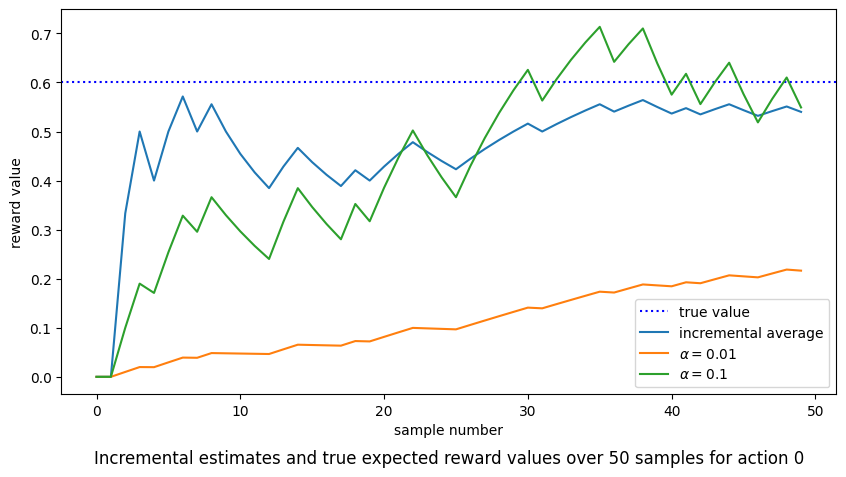

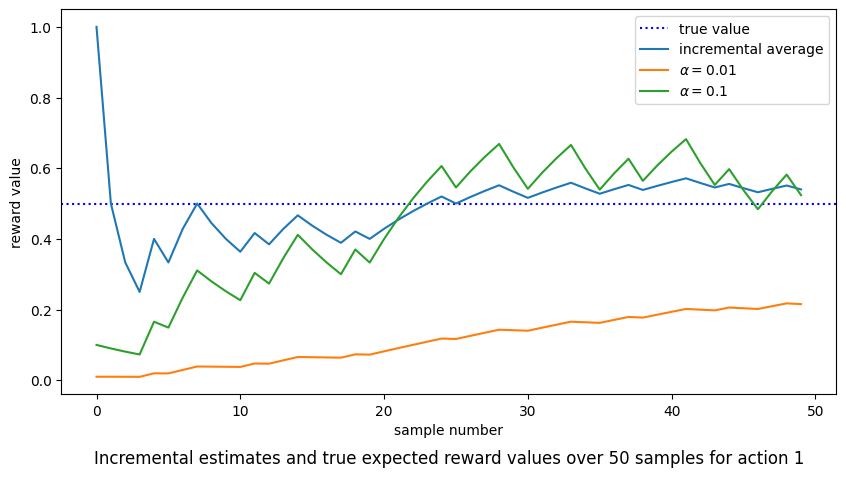

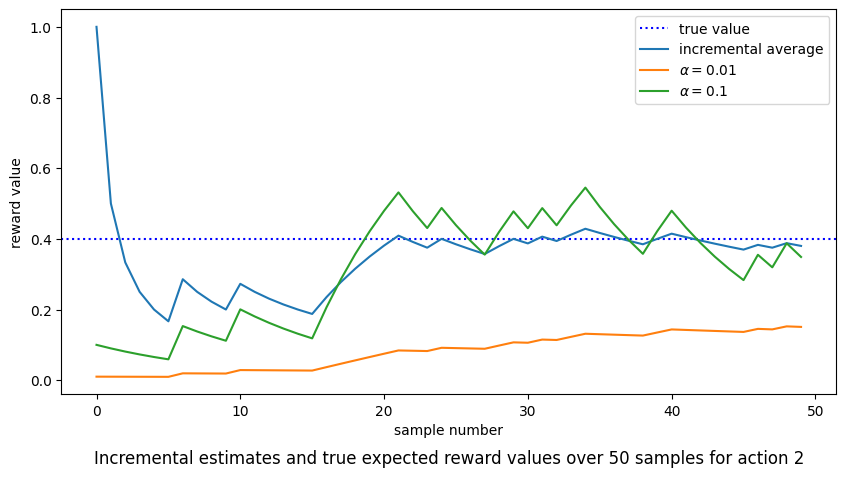

In [ ]:
for action in actions:
  fig, ax = plt.subplots()

  # obtain incremental values for averaging, alpha = 0.01, alpha = 0.1
  incr_avgs = list(updateAvg(action_rewards[action])) #My Code
  alpha_1_percent = list(update(action_rewards[action], 0.01)) #My Code
  alpha_10_percent = list(update(action_rewards[action], 0.1)) #My Code

  true_value = probs_arr[action]

  # draw the true value line
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")

  # plot incremental values for averaging, alpha = 0.01, alpha = 0.1
  plt_incr_avgs, = ax.plot(incr_avgs, label = "incremental average")
  plt_alpha_1_percent, = ax.plot(alpha_1_percent, label = r"$\alpha = 0.01$")
  plt_alpha_10_percent, = ax.plot(alpha_10_percent, label = r"$\alpha = 0.1$")

  ax.set_xlabel("sample number")
  ax.set_ylabel("reward value")
  ax.set_title("Incremental estimates and true expected reward values over 50 samples for action %s" %action, y=-0.2)

  # show the legend with the labels of the line
  ax.legend(handles=[line_true_val, plt_incr_avgs, plt_alpha_1_percent, plt_alpha_10_percent])

## Q3 Effect of $α$ on Estimated Q values

In [ ]:
num_samples = 100

# arrays of the data generated from 100 runs
incr_avgs_runs = []
alpha_1_percent_runs = []
alpha_10_percent_runs = []

for run in range(100):
  # arrays of data generated from the 3 actions in 1 run
  sample_incr_avgs_by_actions = []
  sample_alpha_1_percent_by_actions = []
  sample_alpha_10_percent_by_actions = []

  for action in actions:
    rewards = [three_arm_bernoulli_bandit.sample(action, None) for i in range(num_samples)] #My Code

    sample_incr_avgs_by_actions.append(list(updateAvg(rewards))) #My Code
    sample_alpha_1_percent_by_actions.append(list(update(rewards, 0.01))) #My Code
    sample_alpha_10_percent_by_actions.append(list(update(rewards, 0.1))) #My Code

  incr_avgs_runs.append(sample_incr_avgs_by_actions)
  alpha_1_percent_runs.append(sample_alpha_1_percent_by_actions)
  alpha_10_percent_runs.append(sample_alpha_10_percent_by_actions)

# convert to np arrays
incr_avgs_runs = np.asarray(incr_avgs_runs)
alpha_1_percent_runs = np.asarray(alpha_1_percent_runs)
alpha_10_percent_runs = np.asarray(alpha_10_percent_runs)

### Graphs

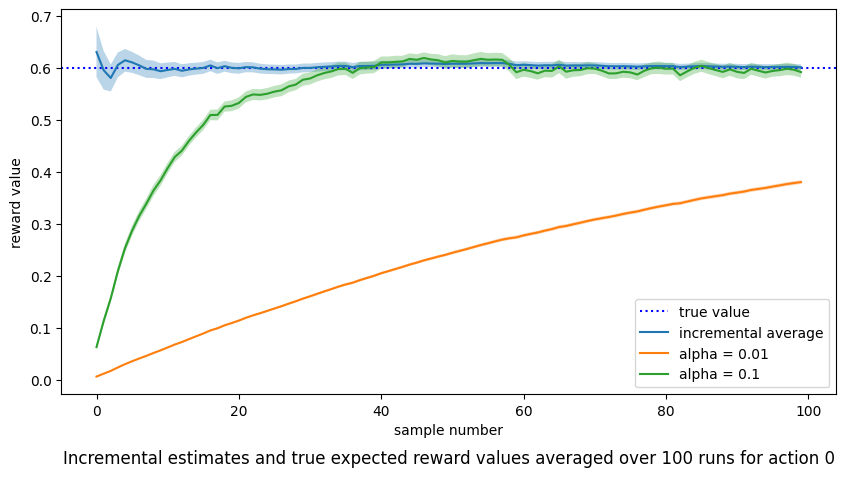

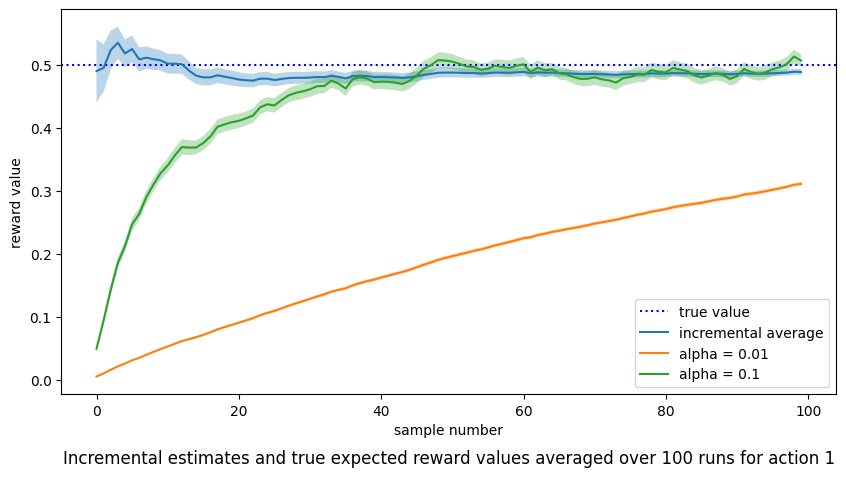

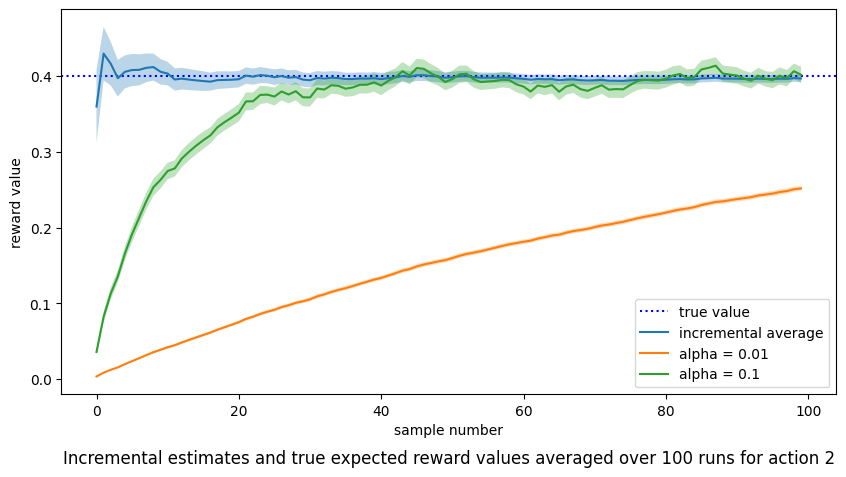

In [ ]:
for action in actions:
  fig, ax = plt.subplots()

  # obtain averaged incremental reward values for averaging, alpha = 0.01, alpha = 0.1 over 100 runs
  mean_incr_avgs_by_actions = np.mean(incr_avgs_runs[:,action,:], axis=0)
  mean_alpha_1_percent_by_actions = np.mean(alpha_1_percent_runs[:,action,:], axis=0)
  mean_alpha_10_percent_by_actions = np.mean(alpha_10_percent_runs[:,action,:], axis=0)
  true_value = probs_arr[action]

  # obtain the standard deviation for averaging, alpha = 0.01, alpha = 0.1 over 100 runs
  std_incr_avgs_by_actions = np.std(incr_avgs_runs[:,action,:], axis=0)
  std_alpha_1_percent_by_actions = np.std(alpha_1_percent_runs[:,action,:], axis=0)
  std_alpha_10_percent_by_actions = np.std(alpha_10_percent_runs[:,action,:], axis=0)

  # obtain the standard error for averaging, alpha = 0.01, alpha = 0.1 over 100 runs
  std_err_incr_avgs_by_actions = np.std(incr_avgs_runs[:,action,:], axis=0) / np.sqrt(np.size(incr_avgs_runs[:,action,:], axis=0))
  std_err_alpha_1_percent_by_actions = np.std(alpha_1_percent_runs[:,action,:], axis=0) / np.sqrt(np.size(alpha_1_percent_runs[:,action,:], axis=0))
  std_err_alpha_10_percent_by_actions = np.std(alpha_10_percent_runs[:,action,:], axis=0) / np.sqrt(np.size(alpha_10_percent_runs[:,action,:], axis=0))

  # draw the true value line
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")

  # draw the averaged incremental reward values for averaging
  plt_incr_avgs, = ax.plot(mean_incr_avgs_by_actions, label = "incremental average")
  # draw the error bar/area for averaging
  incr_avgs_minus_std_err = mean_incr_avgs_by_actions - std_err_incr_avgs_by_actions
  incr_avgs_plus_std_err = mean_incr_avgs_by_actions + std_err_incr_avgs_by_actions
  ax.fill_between(range(0,100), incr_avgs_minus_std_err, incr_avgs_plus_std_err, alpha=0.3)

  # draw the averaged incremental reward values for alpha = 0.01
  plt_alpha_1_percent, = ax.plot(mean_alpha_1_percent_by_actions, label = "alpha = 0.01")
  # draw the error bar/area for alpha = 0.01
  alpha_1_percent_minus_std_err = mean_alpha_1_percent_by_actions - std_err_alpha_1_percent_by_actions
  alpha_1_percent_plus_std_err = mean_alpha_1_percent_by_actions + std_err_alpha_1_percent_by_actions
  ax.fill_between(range(0,100), alpha_1_percent_minus_std_err, alpha_1_percent_plus_std_err, alpha=0.3)

  # draw the averaged incremental reward values for alpha = 0.1
  plt_alpha_10_percent, = ax.plot(mean_alpha_10_percent_by_actions, label = "alpha = 0.1")
  # draw the error bar/area for alpha = 0.1
  alpha_10_percent_minus_std_err = mean_alpha_10_percent_by_actions - std_err_alpha_10_percent_by_actions
  alpha_10_percent_plus_std_err = mean_alpha_10_percent_by_actions + std_err_alpha_10_percent_by_actions
  ax.fill_between(range(0,100), alpha_10_percent_minus_std_err, alpha_10_percent_plus_std_err, alpha=0.3)

  ax.set_xlabel("sample number")
  ax.set_ylabel("reward value")
  ax.set_title("Incremental estimates and true expected reward values averaged over 100 runs for action %s" %action, y=-0.2)

  ax.legend(handles=[line_true_val, plt_incr_avgs, plt_alpha_1_percent, plt_alpha_10_percent])

### Answers

**Observations:**
All three lines converge toward the true value, with the incremental average line consistently being the one closest to the true value. When compared to the 0.01 alpha line, the 0.1 alpha line converges to the true value significantly faster.

**Which of the α values is better:**
Depending on the context of the problem, either alpha value could be the better option. While the larger alpha value converges to the true value faster, it also exhibits more volatility when compared to the smaller alpha value.

**How do they compare to averaging:**
The incremental averaging process demonstrates a balance between quick convergence speed and stability, avoiding the extreme fluctuations seen with large alpha values. Additionally, the starting point is much closer to the true value.

**Best range for α optimization:**
Depending on the need, if we need the line to converge faster, then the alpha value to be tested would be above 0.1, perhaps 0.1 to 0.3. However, if we want to find a medium between the current lines (one with high stability alongside fast convergence), we would test out alpha values between 0.01 and 0.1.

## Q4 Epsilon-greedy

In [ ]:
def epsilon_greedy(bandit, epsilon, alpha = None, num_time_step = 1000):
  """Epsilon greedy algorithm for bandit action selection

  Parameters
  ----------
  bandit : bandit class
      A bernoulli bandit attributes num_arms and probs_arr, and method sample
  epsilon: float
      A parameter which determines the probability for a random action to be selected
  alpha: (optional) float
      A parameter which determined the learning rate for averaging. If alpha is none, incremental averaging is used.
      Default is none, corresponding to incremental averaging.

  Returns
  -------
  R_over_t
      a list of instantaneous return over the time steps
  total_R_over_t
      a list of cummulative reward over the time steps
  est_is_best_over_t
      a list of values of 0 and 1 where 1 indicates the estimated best action is the true best action and 0 otherwise for each time step
  l_over_t
      a list of instanteneous regret over the time steps
  total_l_over_t
      a list of cummulative regret over the time steps
  """

  num_arms = bandit.num_arms

  Q_arr = np.zeros(num_arms) # array of estimated average reward for each action
  N_arr = np.zeros(num_arms) # array of number of times picked for each action
  total_R = 0
  total_l = 0
  actions = range(num_arms)

  opt_value = max(bandit.probs_arr)  #My Code             # highest expected reward among all actions
  best_action = np.argmax(bandit.probs_arr) #My Code                 # the index of the action with highest expected reward

  R_over_t = []
  total_R_over_t = []
  est_is_best_over_t = []
  l_over_t = []
  total_l_over_t = []

  for time_step in range(num_time_step):
    A_star = np.random.choice(np.flatnonzero(Q_arr == Q_arr.max())) #My Code    # get action with highest estimated average reward with random tie-breaking
    A_random = np.random.choice(range(num_arms)) #My Code
    A = np.random.choice([A_random, A_star], p=[epsilon, 1-epsilon]) #My Code   # pick a random action with probability epsilon
    curr_R = bandit.sample(A, time_step)
    N_arr[A] = N_arr[A] + 1

    if alpha == None:
      # incremental averaging
      Q_arr[A] = Q_arr[A] + (curr_R - Q_arr[A]) / N_arr[A] # My Code
    else:
      Q_arr[A] = Q_arr[A] + alpha * (curr_R - Q_arr[A])# My Code

    R_over_t.append(curr_R)

    total_R = total_R + curr_R
    total_R_over_t.append(total_R)

    est_is_best = 1 if A == best_action else 0 # My Code
    est_is_best_over_t.append(est_is_best)

    l_t = opt_value - bandit.probs_arr[A] # My Code
    l_over_t.append(l_t)

    total_l = total_l + l_t
    total_l_over_t.append(total_l)

  return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

### Graphs

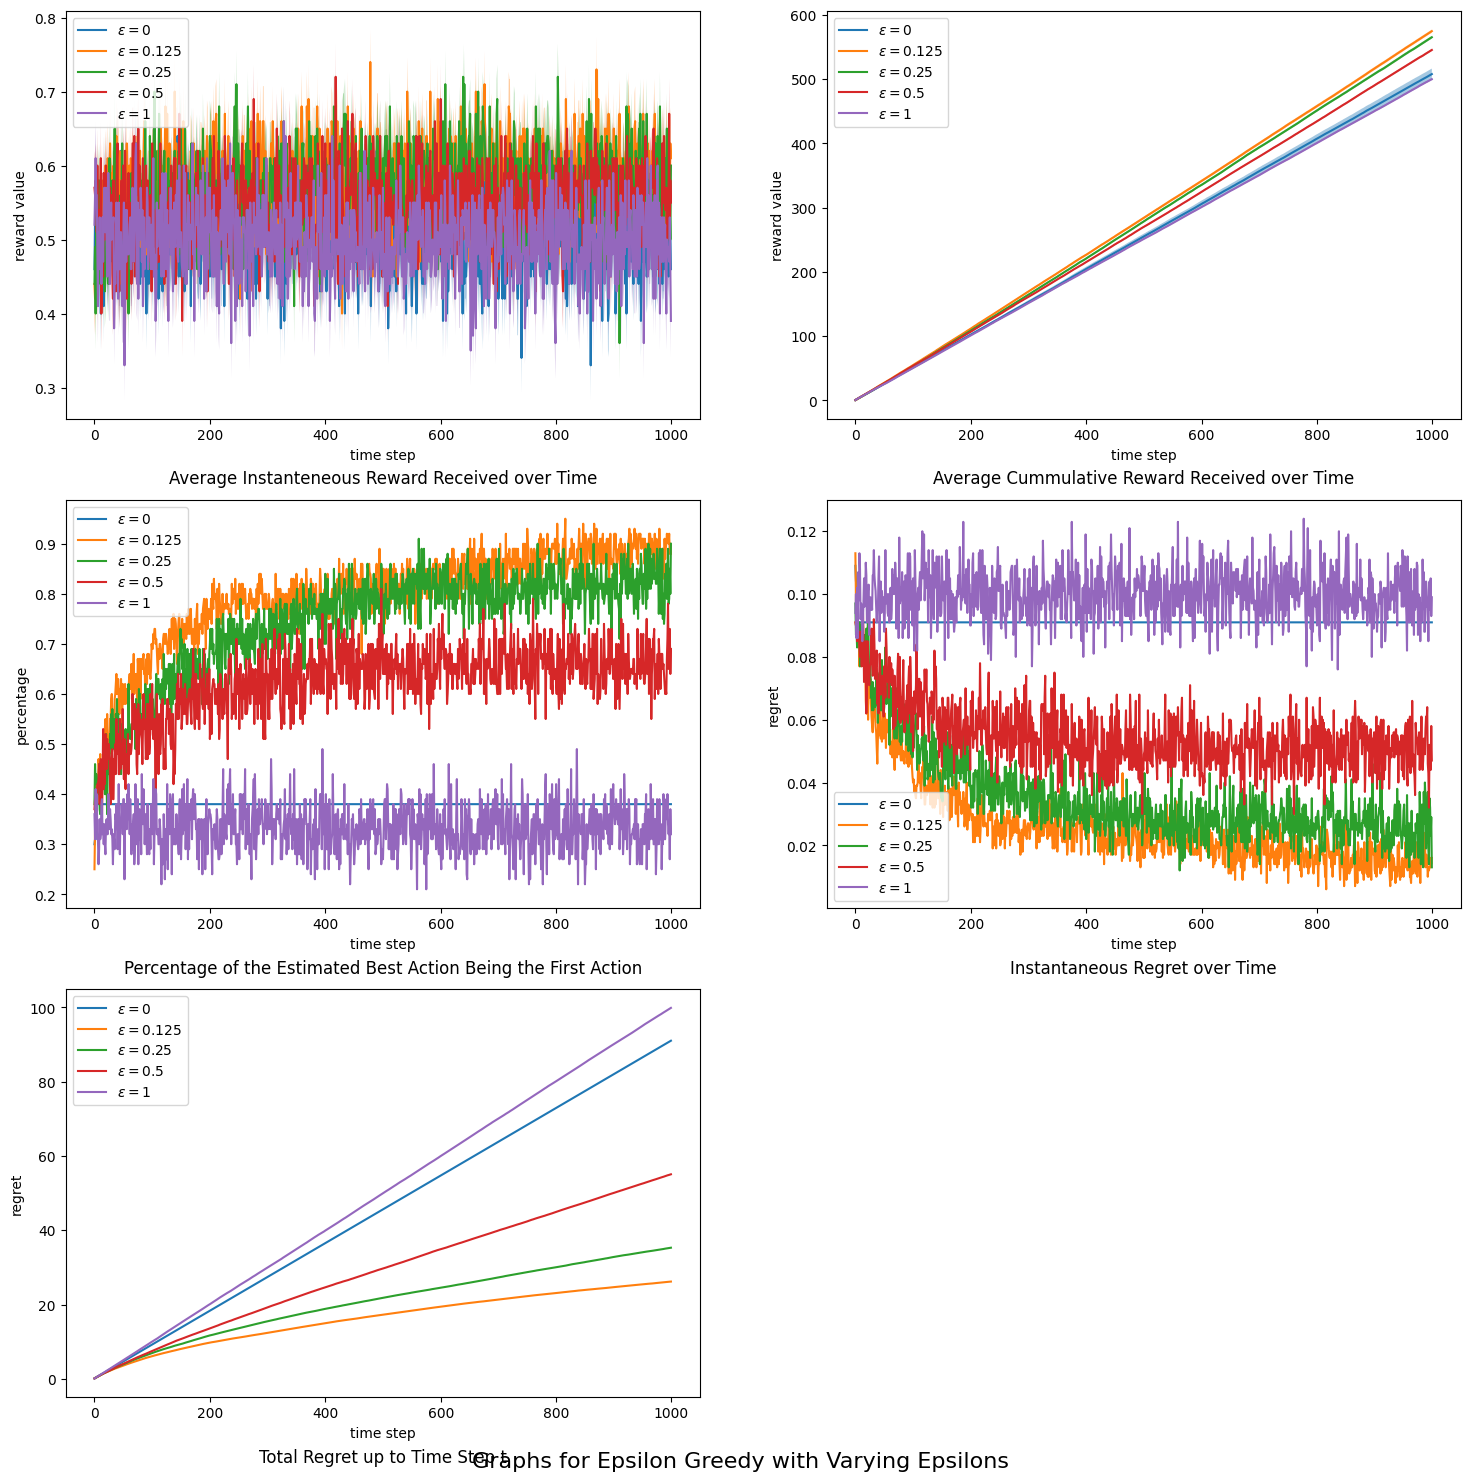

In [ ]:
epsilons = [0, 0.125, 0.25, 0.5, 1]

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for epsilon in epsilons:

  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):
    R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(three_arm_bernoulli_bandit, epsilon)

    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # plot the mean reward over time

  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

  axs[0,0].plot(mean_R_over_t_runs, label = r"$\epsilon = %s$" %epsilon)

  R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
  R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
  axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
  # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward value")
  axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

  # plot the mean cummulative reward over time

  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

  axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\epsilon = %s$" %epsilon)

  total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
  total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
  axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("reward value")
  axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

  #plot the mean percentage of the estimated best action being the first action

  est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
  plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("percentage")
  axs[1,0].set_title("Percentage of the Estimated Best Action Being the First Action", y=-0.18)

  #plot the mean instantaneous regret over time

  l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
  axs[1,1].plot(l_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  #plot the total regret over time

  total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
  axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = r'Graphs for Epsilon Greedy with Varying Epsilons'
fig.suptitle(title, fontsize=16, y=0.08)

plt.show()

### Answers

## **Observation of the graphs and effects of ε:**


### 1.   *Average Instanteneous Reward Received over Time* Graph

The graph allows us to observe how the average reward changes over time for different epsilon values, where a faster increase in average reward indicates more effective learning.

In our graph, we see that regardless of the epsilon's values, the progression in time step does not significantly impact the average instantaneous reward received. We observe a range of 0.3 (0.4 to 0.7) for each epsilon value, oscillating throughout the time steps.

Although the average instantaneous reward received does not increase significantly over time, we observe that an epsilon value of 0.125 generally has a better average instantaneous reward compared to other epsilon values; the "orange" line generates the highest value most regularly.

### 2.   *Average Cummulative Reward Received over Time* Graph

This graph allows us to visualize the cumulative reward over time to see how well the algorithm performs overall. A steeper curve suggests better cumulative performance.

As seen in the graph, all the epsilon values start with a reward of zero and increase linearly as each time step occurs. We see that an epsilon value of 0.125 performs the best, followed by 0.25, 0.5, 0 and 1. Although it initially appears that a lower the epsilon value leads to better cumulative performance, this pattern is not absolute. Looking at the performance of an epsilon of 0, it performs second worst, as a result of a lack of exploration. Overall, we conclude that the epsilon value has a significant impact on the performance of this algorithm, and that the value should be chosen carefully.

### 3.   *Percentage of the Estimated Best Action Being the First Action* Graph

This graph analyzes how often the estimated best action is the first action chosen. Higher percentages suggest better exploitation, while lower percentages indicate more exploration.

There are 3 distinct group/class observations that could be made here:
1.  Increasing percentage: the epsilon values that resulted in an overall increase in percentage of estimated best action being the first action
2.  Constant percentage: the epsilon values that resulted in a constant non-differing percentage
3.  Differing yet constant percentage: the epsilon values that resulted in an overall constant non-differing percentage with non-characteristic oscillation between a range of values.


For group 1, it is observed that 0.125, 0.25, 0.5 epsilon values have a logarithmic-like growth with 0.125 marginally outperforming 0.25. The growth comparison between 0.25 and 0.5 is more distinct. This shows that we are approaching the optimal value of epsilon as we decrease epsilon to 0.125 for this performance metric.

For group 2, it is observed that if we have a 0 epsilon value, the percentage is always at 0.5. This makes sense as the algorithm always exploits the current best estimate of the action values and never explores randomly.

For group 3, it is observed that if we have a 1 epsilon value, the percentage stays within the range of 0.25 to 0.45, with an overall  linear average of 0.35. This shows that the algorithm is not consistently identifying the true best action as the first action even with its high exploration rate.


### 4.   *Instantaneous Regret over Time* Graph

This graph looks at how the instantaneous regret changes over time. A decreasing regret implies that the algorithm is getting better at selecting optimal actions.

As expected, this graph is the opposite of graph 3 (*Percentage of the Estimated Best Action Being the First Action* Graph). This is because instantaneous regret measures the regret incurred when the algorithm does not choose the true best action. Which means that it has a direct correlation (but in an opposite manner) between the two graphs.

As seen, an epsilon value of 0.125 has the least amount of regret, whereas an epsilon value of 0 has a constant instantaneous regret.


### 5.   *Total Regret up to Time Step t* Graph

This graph demonstrates the total regret over time to see how well the algorithm minimizes regret. A lower total regret signifies better overall performance.

This graph shows most clearly which epsilon value is the best choice, specifically 0.125 minimizes the total regret as the time step progresses. This is in agreement with the previous four graphs,but this graph shows this result most clearly/consistently as the lines are linear, distinct and differentiable.



##Q5 Hyperparameters for Epsilon-greedy

To have a plain start, you have been provided with predefined functions for generating plots until now. However, moving forward, you are expected to plot graphs on your own.

### Graphs

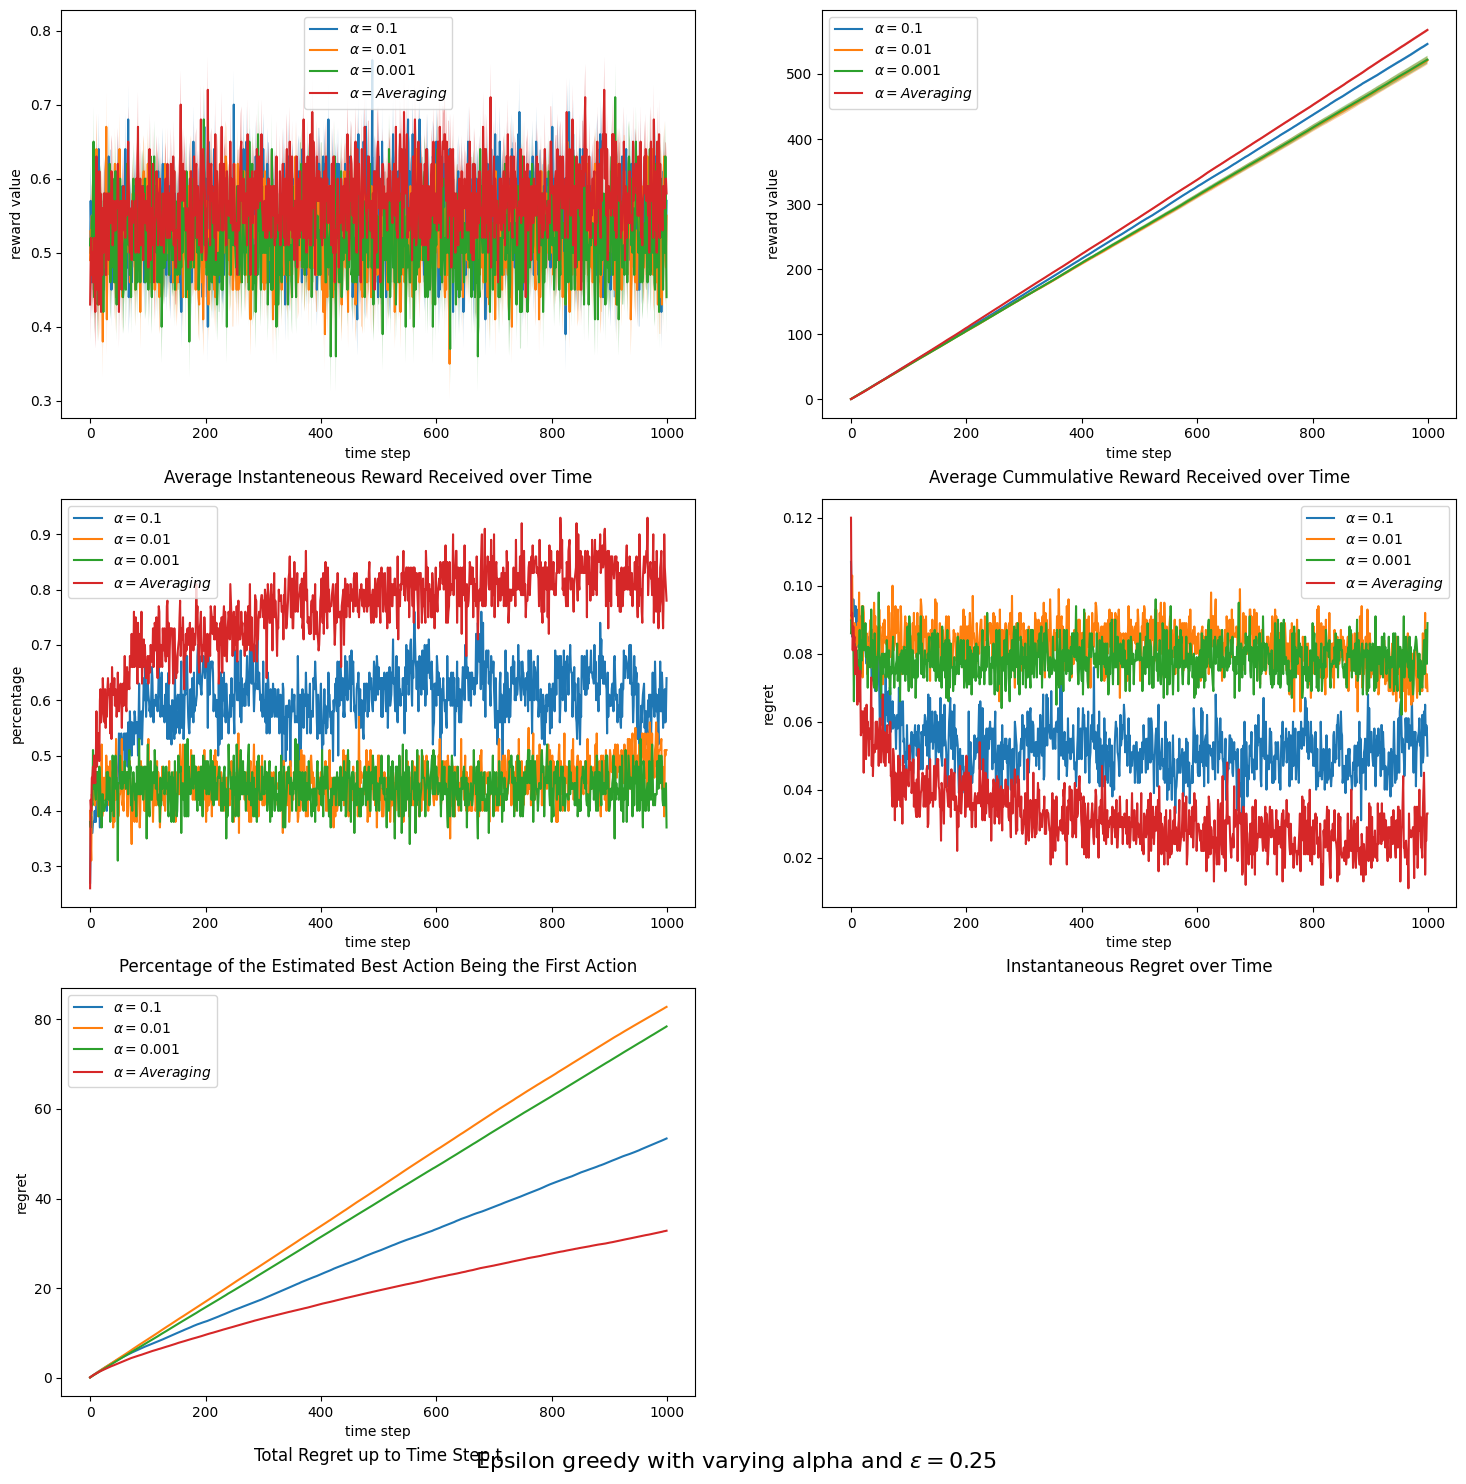

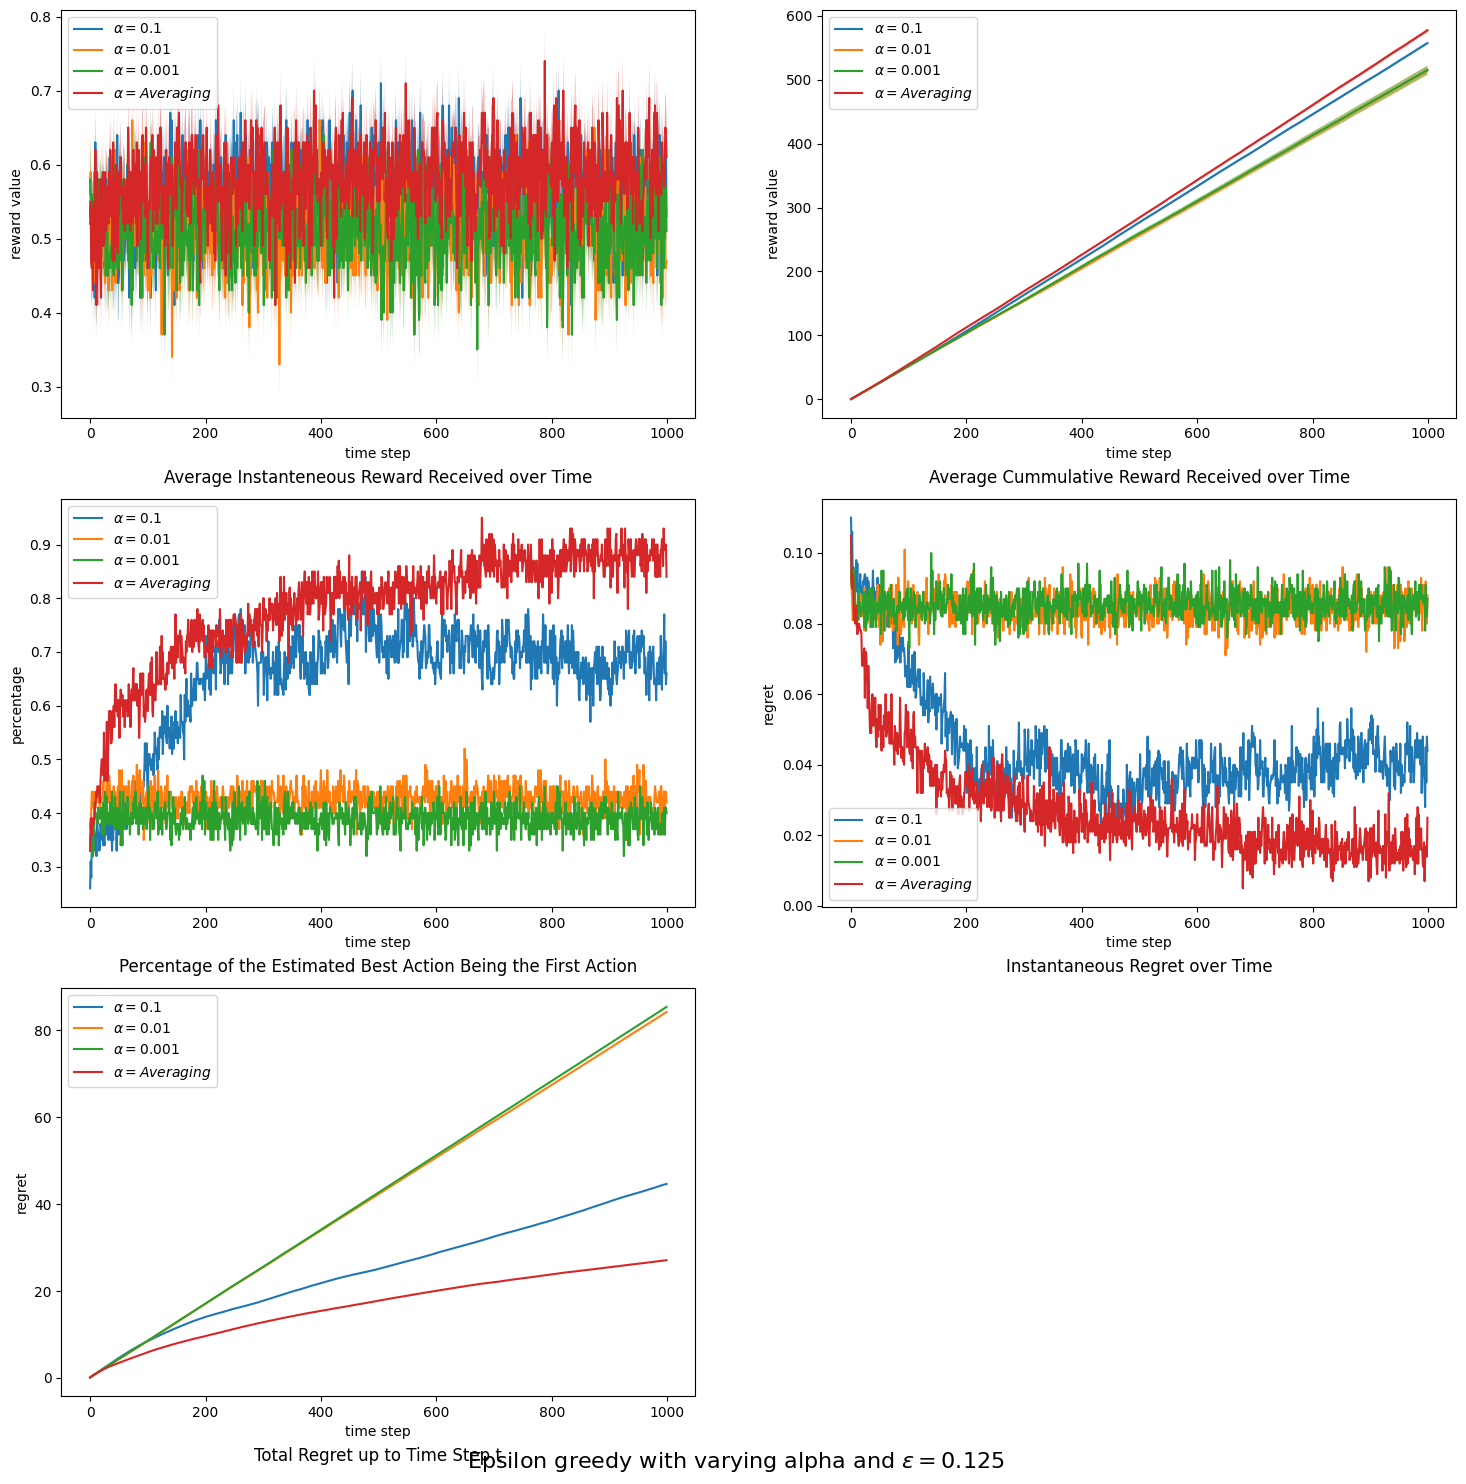

In [ ]:
epsilons = [1/4, 1/8]
alphas = [0.1, 0.01, 0.001, None]
alphas_naming = {
    0.1: "0.1",
    0.01: "0.01",
    0.001: "0.001",
    None: "Averaging"
}

for epsilon in epsilons:
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
    for alpha in alphas:
        # arrays of the data generated from 100 runs
        R_over_t_runs = []
        total_R_over_t_runs = []
        est_is_best_over_t_runs = []
        l_over_t_runs = []
        total_l_over_t_runs = []

        for run in range(100):
          R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(three_arm_bernoulli_bandit, epsilon, alpha)

          R_over_t_runs.append(R_over_t)
          total_R_over_t_runs.append(total_R_over_t)
          est_is_best_over_t_runs.append(est_is_best_over_t)
          l_over_t_runs.append(l_over_t)
          total_l_over_t_runs.append(total_l_over_t)

        R_over_t_runs = np.asarray(R_over_t_runs)
        total_R_over_t_runs = np.asarray(total_R_over_t_runs)
        est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
        l_over_t_runs = np.asarray(l_over_t_runs)
        total_l_over_t_runs = np.asarray(total_l_over_t_runs)

        # plot the mean reward over time

        mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
        std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

        axs[0,0].plot(mean_R_over_t_runs, label = r"$\alpha = %s$" %alphas_naming[alpha])

        R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
        R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
        axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
        # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

        axs[0,0].legend()
        axs[0,0].set_xlabel("time step")
        axs[0,0].set_ylabel("reward value")
        axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

        # plot the mean cummulative reward over time

        mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
        std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

        axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\alpha = %s$" %alphas_naming[alpha])

        total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
        total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
        axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

        axs[0,1].legend()
        axs[0,1].set_xlabel("time step")
        axs[0,1].set_ylabel("reward value")
        axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

        #plot the mean percentage of the estimated best action being the first action

        est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
        plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\alpha = %s$" %alphas_naming[alpha])

        axs[1,0].legend()
        axs[1,0].set_xlabel("time step")
        axs[1,0].set_ylabel("percentage")
        axs[1,0].set_title("Percentage of the Estimated Best Action Being the First Action", y=-0.18)

        #plot the mean instantaneous regret over time

        l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
        axs[1,1].plot(l_over_t_runs_avgs, label = r"$\alpha = %s$" %alphas_naming[alpha])

        axs[1,1].legend()
        axs[1,1].set_xlabel("time step")
        axs[1,1].set_ylabel("regret")
        axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

        #plot the total regret over time

        total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
        axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\alpha = %s$" %alphas_naming[alpha])

        axs[2,0].legend()
        axs[2,0].set_xlabel("time step")
        axs[2,0].set_ylabel("regret")
        axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

    axs[-1, -1].axis('off')

    title = r'Epsilon greedy with varying alpha and $\epsilon = %s$' %epsilon
    fig.suptitle(title, fontsize=16, y=0.08)

    plt.show()

### Answers

**Observation:**
Between the two sets of graphs, it seems that they follow the same trend for each type of graph. However, it seems that the lower epsilon (0.125) causes each steps to oscillate less (smaller absolute difference between adjacent time steps).

## Q6 UCB

In [ ]:
#My Code
def UCB(bandit, c = 2, alpha = None, num_time_step = 1000):
  """Upper confidence bound algorithm for bandit action selection

  Parameters
  ----------
  bandit : bandit class
      A bernoulli bandit attributes num_arms and probs_arr, and method sample
  c: int
      A parameter which determines the degree of exploration, the higher the c the higher the tendency for
      the algorithm to explore potentially suboptimal actionss
  alpha: (optional) float
      A parameter which determined the learning rate for averaging. If alpha is none, incremental averaging is used.
      Default is none, corresponding to incremental averaging.

  Returns
  -------
  R_over_t
      a list of instantaneous return over the time steps
  total_R_over_t
      a list of cummulative reward over the time steps
  est_is_best_over_t
      a list of values of 0 and 1 where 1 indicates the estimated best action is the true best action and 0 otherwise for each time step
  l_over_t
      a list of instanteneous regret over the time steps
  total_l_over_t
      a list of cummulative regret over the time steps
  """

  """ YOUR CODE GOES HERE """

  num_arms = bandit.num_arms

  Q_arr = np.zeros(num_arms)
  N_arr = np.zeros(num_arms)
  total_R = 0
  total_l = 0
  actions = range(num_arms)

  opt_value = max(bandit.probs_arr)
  best_action = np.argmax(bandit.probs_arr)

  R_over_t = []
  total_R_over_t = []
  est_is_best_over_t = []
  l_over_t = []
  total_l_over_t = []

  for time_step in range(num_time_step):
      # UCB action selection
      if min(N_arr) == 0:
          A = np.argmin(N_arr)  # Choose the least visited arm initially
      else:
          UCB_values = Q_arr + c * np.sqrt(np.log(time_step + 1) / N_arr)
          A = np.argmax(UCB_values)

      curr_R = bandit.sample(A, time_step)
      N_arr[A] = N_arr[A] + 1

      if alpha is None:
          # Incremental averaging
          Q_arr[A] = Q_arr[A] + (curr_R - Q_arr[A]) / N_arr[A]
      else:
          Q_arr[A] = Q_arr[A] + alpha * (curr_R - Q_arr[A])

      R_over_t.append(curr_R)

      total_R = total_R + curr_R
      total_R_over_t.append(total_R)

      est_is_best = 1 if A == best_action else 0
      est_is_best_over_t.append(est_is_best)

      l_t = opt_value - bandit.probs_arr[A]
      l_over_t.append(l_t)

      total_l = total_l + l_t
      total_l_over_t.append(total_l)

  return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

### Graphs

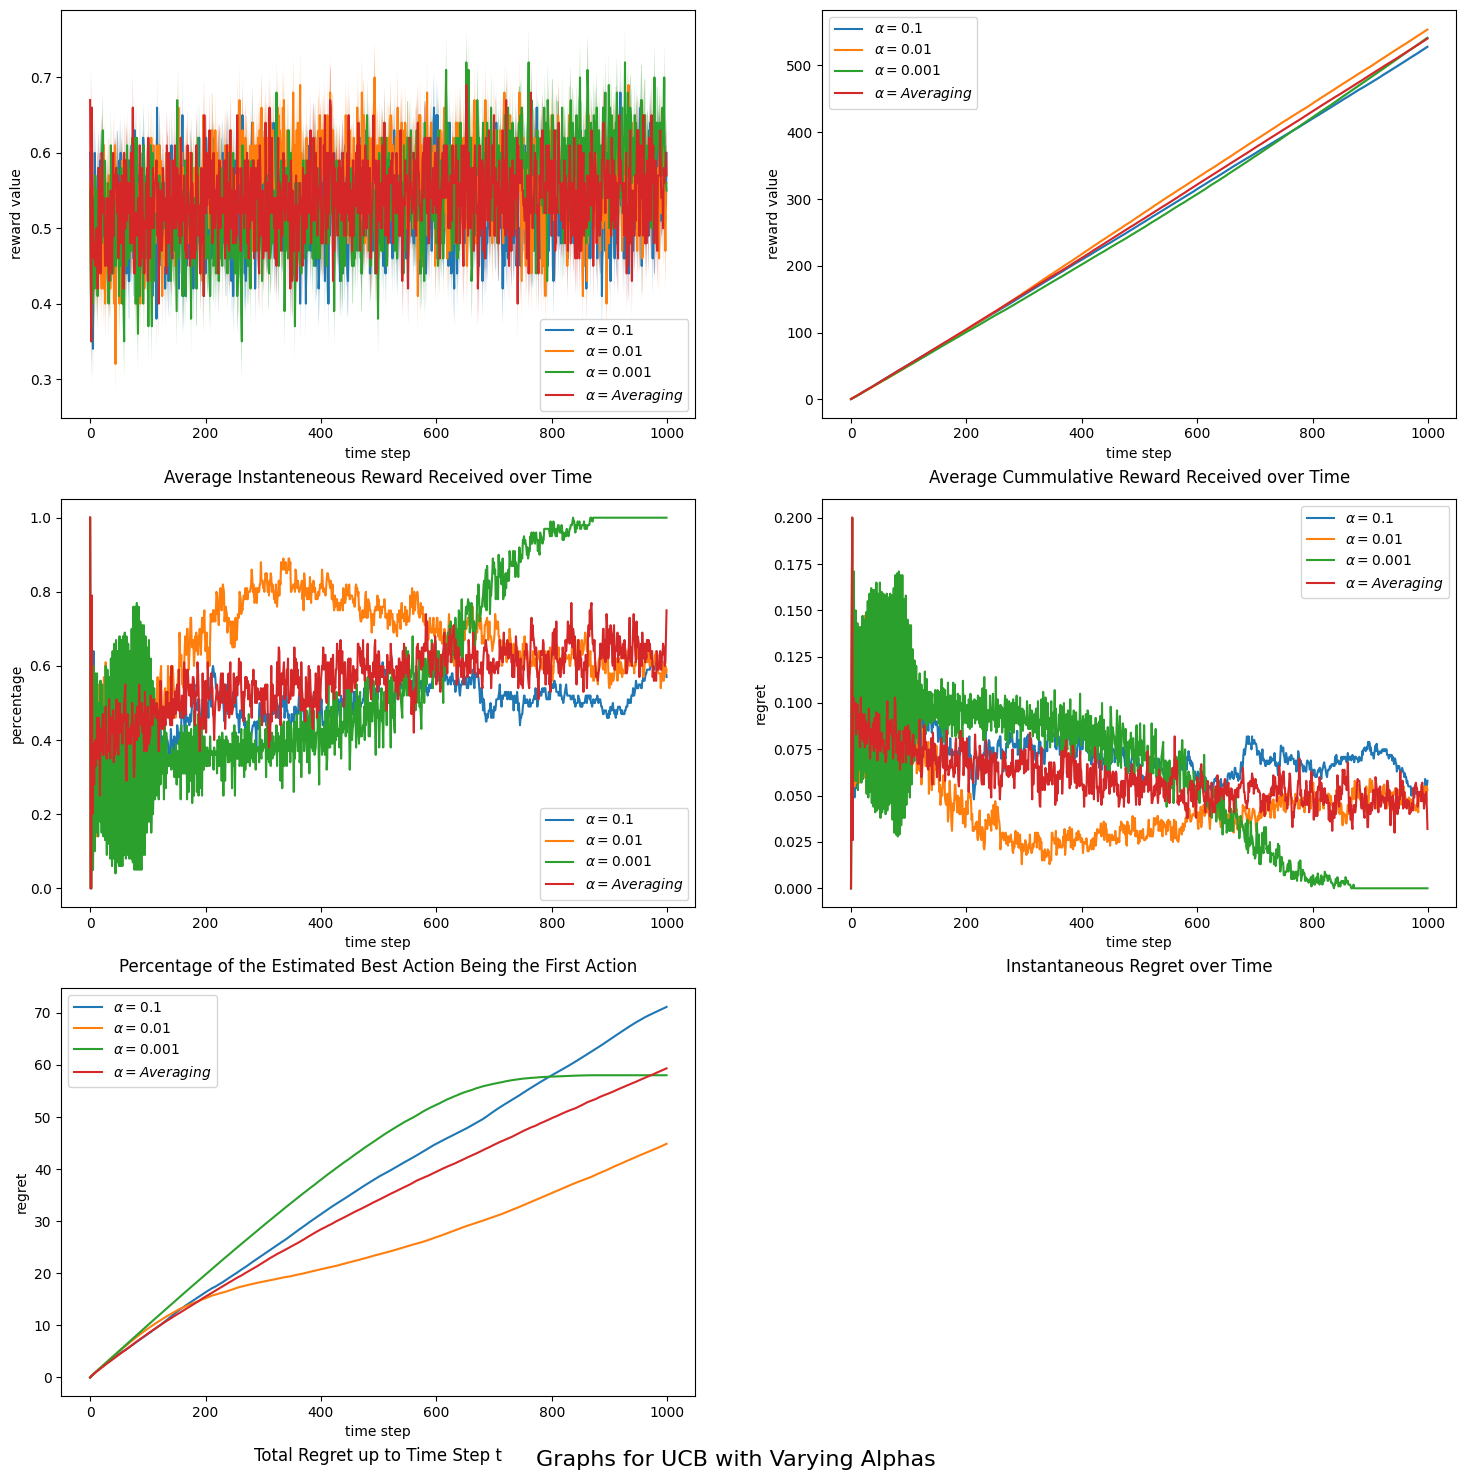

In [ ]:
alphas = [0.1, 0.01, 0.001, None]
alphas_naming = {
    0.1: "0.1",
    0.01: "0.01",
    0.001: "0.001",
    None: "Averaging"
}

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for alpha in alphas:

  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):
    R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = UCB(three_arm_bernoulli_bandit, c = 2, alpha = alpha)

    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # plot the mean reward over time

  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

  axs[0,0].plot(mean_R_over_t_runs, label = r"$\alpha = %s$" %alphas_naming[alpha])

  R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
  R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
  axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
  # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward value")
  axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

  # plot the mean cummulative reward over time

  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

  axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\alpha = %s$" %alphas_naming[alpha])

  total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
  total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
  axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("reward value")
  axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

  #plot the mean percentage of the estimated best action being the first action

  est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
  plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\alpha = %s$" %alphas_naming[alpha])

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("percentage")
  axs[1,0].set_title("Percentage of the Estimated Best Action Being the First Action", y=-0.18)

  #plot the mean instantaneous regret over time

  l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
  axs[1,1].plot(l_over_t_runs_avgs, label = r"$\alpha = %s$" %alphas_naming[alpha])

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  #plot the total regret over time

  total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
  axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\alpha = %s$" %alphas_naming[alpha])

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = r'Graphs for UCB with Varying Alphas'
fig.suptitle(title, fontsize=16, y=0.08)

plt.show()

### Answers

**Observation:**

With the UCB algorithm, we observe that at lower time steps, the adjacent time step varies a lot in percentage of estimated best action being the first action, and the instantaneous regret. Interestingly enough, we can see that the total regret for a 0.001 alpha value seems to be plateauing at time step 600. Although from 1000 time steps, it is seen that the 0.01 alpha value has the least amount of total regret at time step 1000; however, an alpha value of 0.001 may be a better choice. This can be more confidently evaluated by taking more time steps, and then confirmed by the quantitative data.

### Best Hyper Parameter Search (Extra testing done by our group)

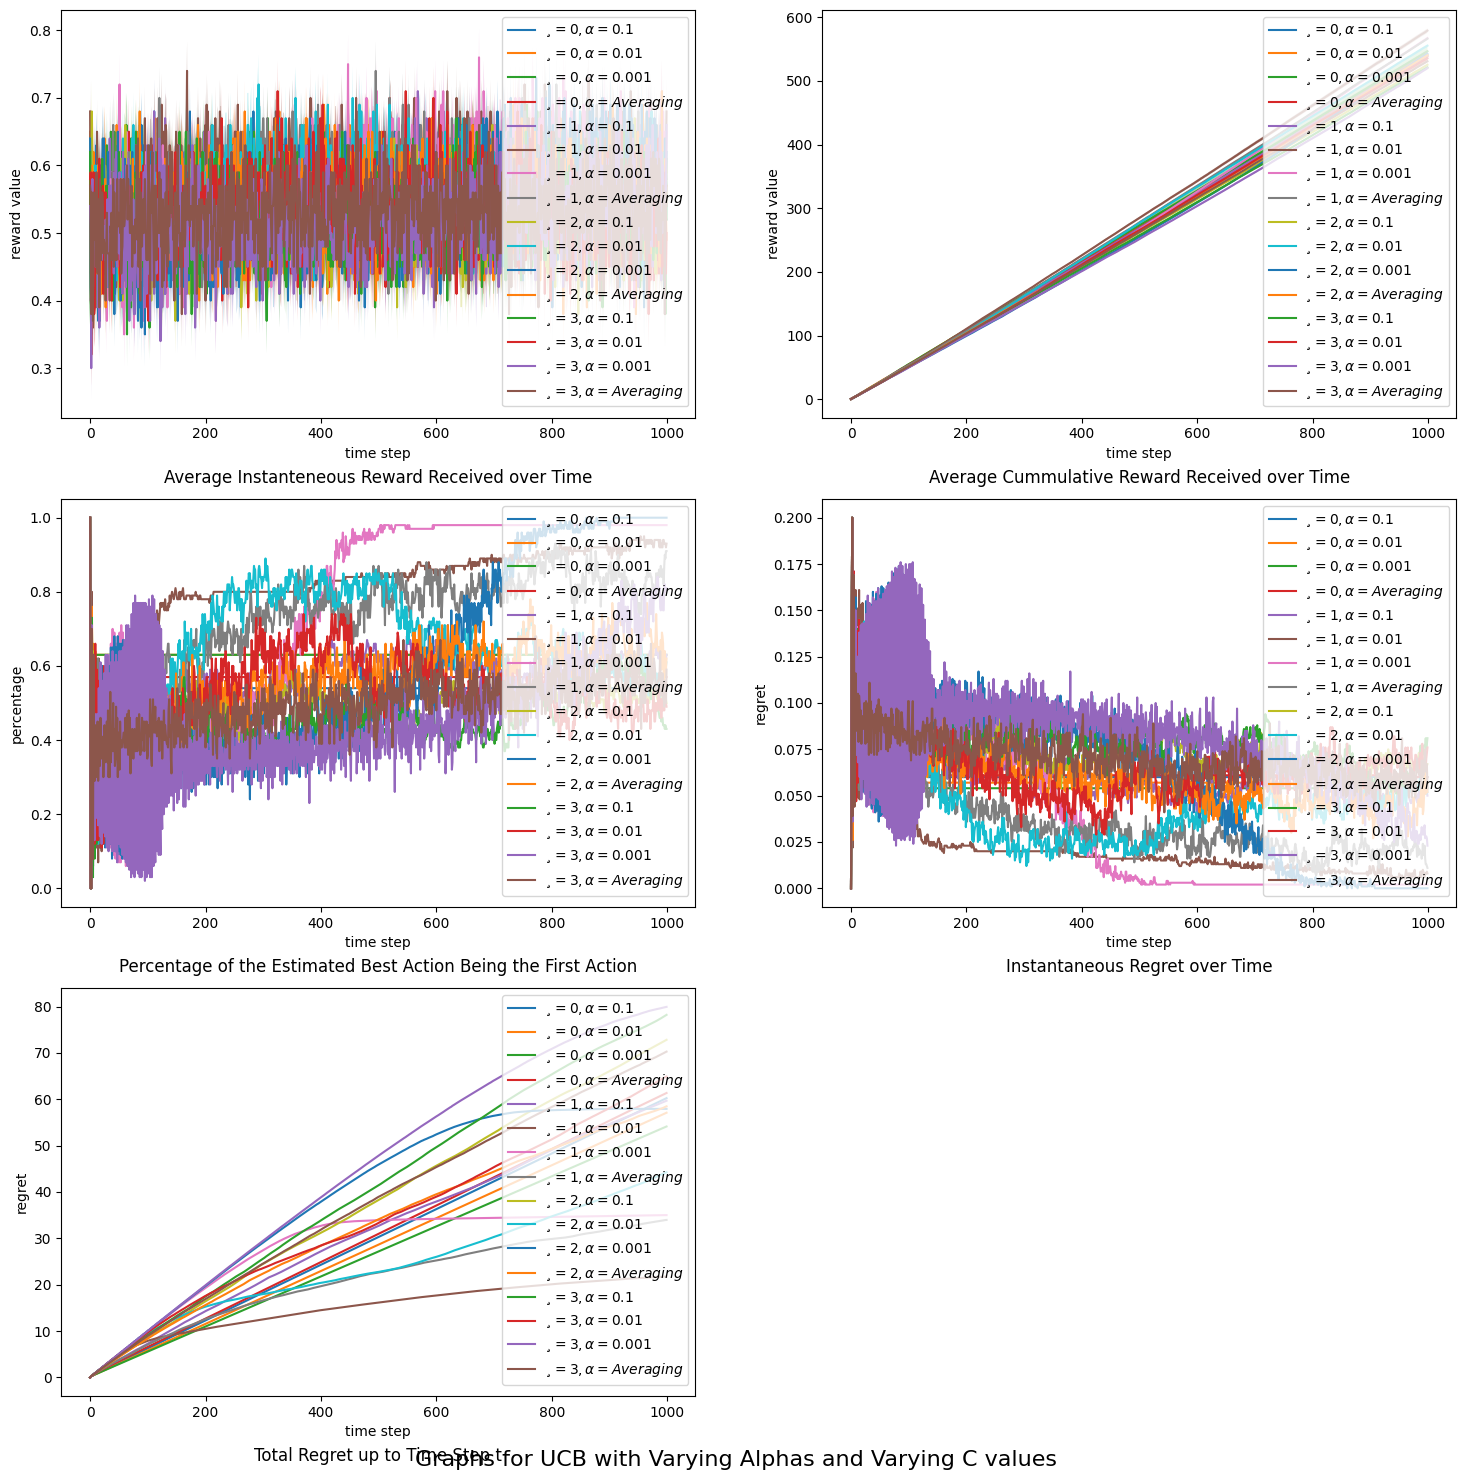

In [ ]:
alphas = [0.1, 0.01, 0.001, None]
c = [0, 1, 2, 3]
alphas_naming = {
    0.1: "0.1",
    0.01: "0.01",
    0.001: "0.001",
    None: "Averaging"
}

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for ci in c:
  for alpha in alphas:

    # arrays of the data generated from 100 runs
    R_over_t_runs = []
    total_R_over_t_runs = []
    est_is_best_over_t_runs = []
    l_over_t_runs = []
    total_l_over_t_runs = []

    for run in range(100):
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = UCB(three_arm_bernoulli_bandit, c = ci, alpha = alpha)

      R_over_t_runs.append(R_over_t)
      total_R_over_t_runs.append(total_R_over_t)
      est_is_best_over_t_runs.append(est_is_best_over_t)
      l_over_t_runs.append(l_over_t)
      total_l_over_t_runs.append(total_l_over_t)

    R_over_t_runs = np.asarray(R_over_t_runs)
    total_R_over_t_runs = np.asarray(total_R_over_t_runs)
    est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
    l_over_t_runs = np.asarray(l_over_t_runs)
    total_l_over_t_runs = np.asarray(total_l_over_t_runs)

    # plot the mean reward over time

    mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
    std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

    axs[0,0].plot(mean_R_over_t_runs, label = r"$\c = %s, \alpha = %s$" % (ci, alphas_naming[alpha]))

    R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
    R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
    axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
    # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

    axs[0,0].legend()
    axs[0,0].set_xlabel("time step")
    axs[0,0].set_ylabel("reward value")
    axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

    # plot the mean cummulative reward over time

    mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
    std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

    axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\c = %s, \alpha = %s$" % (ci, alphas_naming[alpha]))

    total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
    total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
    axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

    axs[0,1].legend()
    axs[0,1].set_xlabel("time step")
    axs[0,1].set_ylabel("reward value")
    axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

    #plot the mean percentage of the estimated best action being the first action

    est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
    plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\c = %s, \alpha = %s$" % (ci, alphas_naming[alpha]))

    axs[1,0].legend()
    axs[1,0].set_xlabel("time step")
    axs[1,0].set_ylabel("percentage")
    axs[1,0].set_title("Percentage of the Estimated Best Action Being the First Action", y=-0.18)

    #plot the mean instantaneous regret over time

    l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
    axs[1,1].plot(l_over_t_runs_avgs, label = r"$\c = %s, \alpha = %s$" % (ci, alphas_naming[alpha]))

    axs[1,1].legend()
    axs[1,1].set_xlabel("time step")
    axs[1,1].set_ylabel("regret")
    axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

    #plot the total regret over time

    total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
    axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\c = %s, \alpha = %s$" % (ci, alphas_naming[alpha]))

    axs[2,0].legend()
    axs[2,0].set_xlabel("time step")
    axs[2,0].set_ylabel("regret")
    axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = r'Graphs for UCB with Varying Alphas and Varying C values'
fig.suptitle(title, fontsize=16, y=0.08)

plt.show()

## Q7 Thompson Sampling

In [ ]:
#My Code
def Thompson_sampling(bandit, num_time_step = 1000):
  """Thompson sampling algorithm for bandit action selection

  Parameters
  ----------
  bandit : bandit class
      A bernoulli bandit attributes num_arms and probs_arr, and method sample

  Returns
  -------
  R_over_t
      a list of instantaneous return over the time steps
  total_R_over_t
      a list of cummulative reward over the time steps
  est_is_best_over_t
      a list of values of 0 and 1 where 1 indicates the estimated best action is the true best action and 0 otherwise for each time step
  l_over_t
      a list of instanteneous regret over the time steps
  total_l_over_t
      a list of cummulative regret over the time steps
  """

  """ YOUR CODE GOES HERE """
  num_arms = bandit.num_arms

  # Variables to store counts and successes for each arm
  counts = np.zeros(num_arms)
  successes = np.zeros(num_arms)

  R_over_t = []
  total_R_over_t = []
  est_is_best_over_t = []
  l_over_t = []
  total_l_over_t = []

  for time_step in range(num_time_step):
      # Thompson Sampling logic
      sampled_values = np.random.beta(successes + 1, counts - successes + 1)
      chosen_arm = np.argmax(sampled_values)

      # Sample reward from chosen arm
      curr_R = bandit.sample(chosen_arm, time_step)

      # Update counts and successes
      counts[chosen_arm] += 1
      successes[chosen_arm] += curr_R

      # Update relevant statistics and regret
      R_over_t.append(curr_R)
      total_R_over_t.append(sum(R_over_t))
      est_is_best_over_t.append(int(chosen_arm == np.argmax(bandit.probs_arr)))
      l_over_t.append(max(bandit.probs_arr) - bandit.probs_arr[chosen_arm])
      total_l_over_t.append(sum(l_over_t))

  return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

### Graphs

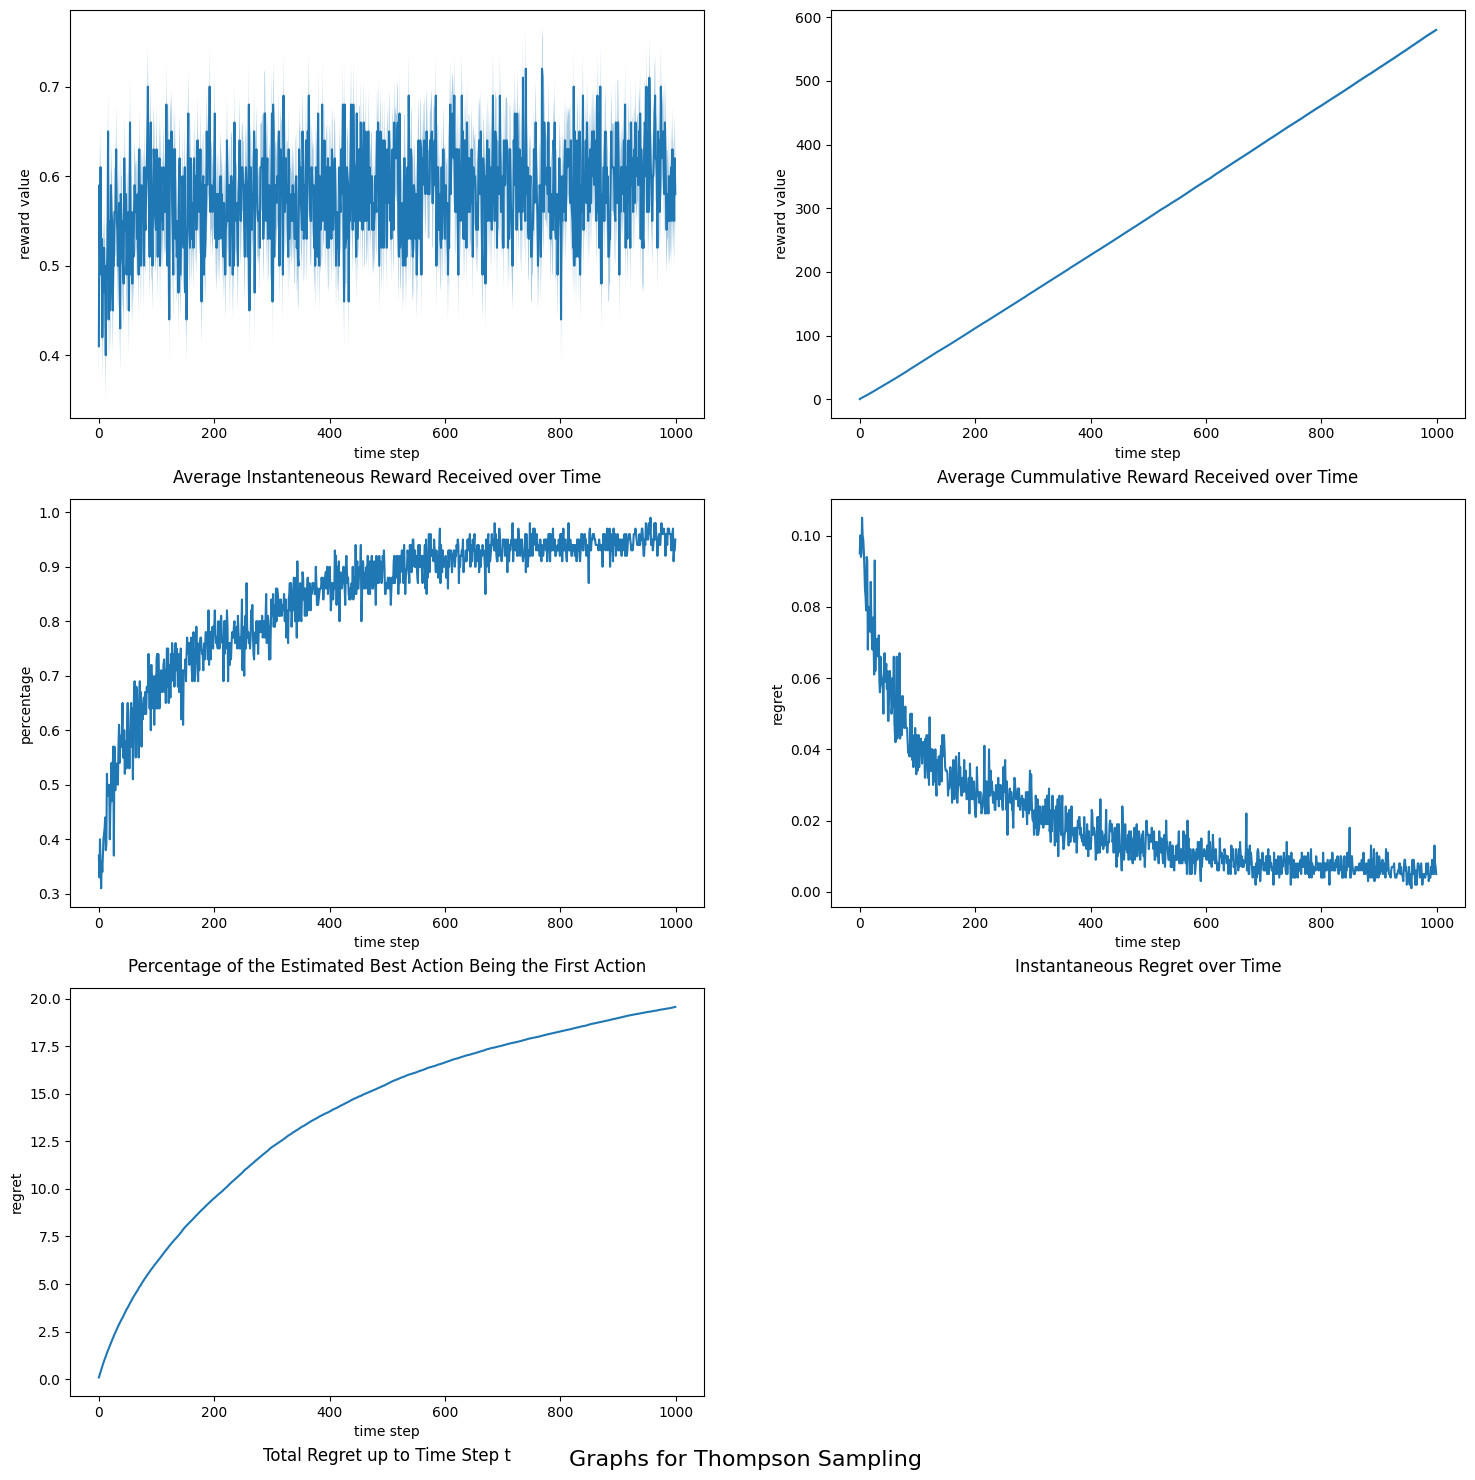

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

# arrays of the data generated from 100 runs
R_over_t_runs = []
total_R_over_t_runs = []
est_is_best_over_t_runs = []
l_over_t_runs = []
total_l_over_t_runs = []

for run in range(100):
  R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = Thompson_sampling(three_arm_bernoulli_bandit)

  R_over_t_runs.append(R_over_t)
  total_R_over_t_runs.append(total_R_over_t)
  est_is_best_over_t_runs.append(est_is_best_over_t)
  l_over_t_runs.append(l_over_t)
  total_l_over_t_runs.append(total_l_over_t)

R_over_t_runs = np.asarray(R_over_t_runs)
total_R_over_t_runs = np.asarray(total_R_over_t_runs)
est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
l_over_t_runs = np.asarray(l_over_t_runs)
total_l_over_t_runs = np.asarray(total_l_over_t_runs)

# plot the mean reward over time

mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

axs[0,0].plot(mean_R_over_t_runs)

R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
# axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

axs[0,0].set_xlabel("time step")
axs[0,0].set_ylabel("reward value")
axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

# plot the mean cummulative reward over time

mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

axs[0,1].plot(mean_total_R_over_t_runs)

total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

axs[0,1].set_xlabel("time step")
axs[0,1].set_ylabel("reward value")
axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

#plot the mean percentage of the estimated best action being the first action

est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs)

axs[1,0].set_xlabel("time step")
axs[1,0].set_ylabel("percentage")
axs[1,0].set_title("Percentage of the Estimated Best Action Being the First Action", y=-0.18)

#plot the mean instantaneous regret over time

l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
axs[1,1].plot(l_over_t_runs_avgs)

axs[1,1].set_xlabel("time step")
axs[1,1].set_ylabel("regret")
axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

#plot the total regret over time

total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
axs[2,0].plot(total_l_over_t_runs_avgs)

axs[2,0].set_xlabel("time step")
axs[2,0].set_ylabel("regret")
axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = r'Graphs for Thompson Sampling'
fig.suptitle(title, fontsize=16, y=0.08)

plt.show()

### Answers

**Observation:**
From the first look, this may seem to follow the usual trend that was seen with both the UCB algorithm and ε-greedy algorithm. However, on closer observation, we can see that the numbering on the axis are different. Specifically, the total regret after time step 1000 is around 20, whereas the other two algorithms reached 80. More on the comparison will be done in Question 8, where we can visually compare each of the algorithms side by side.

## Q8 Comparison of Algorithms

### Graphs

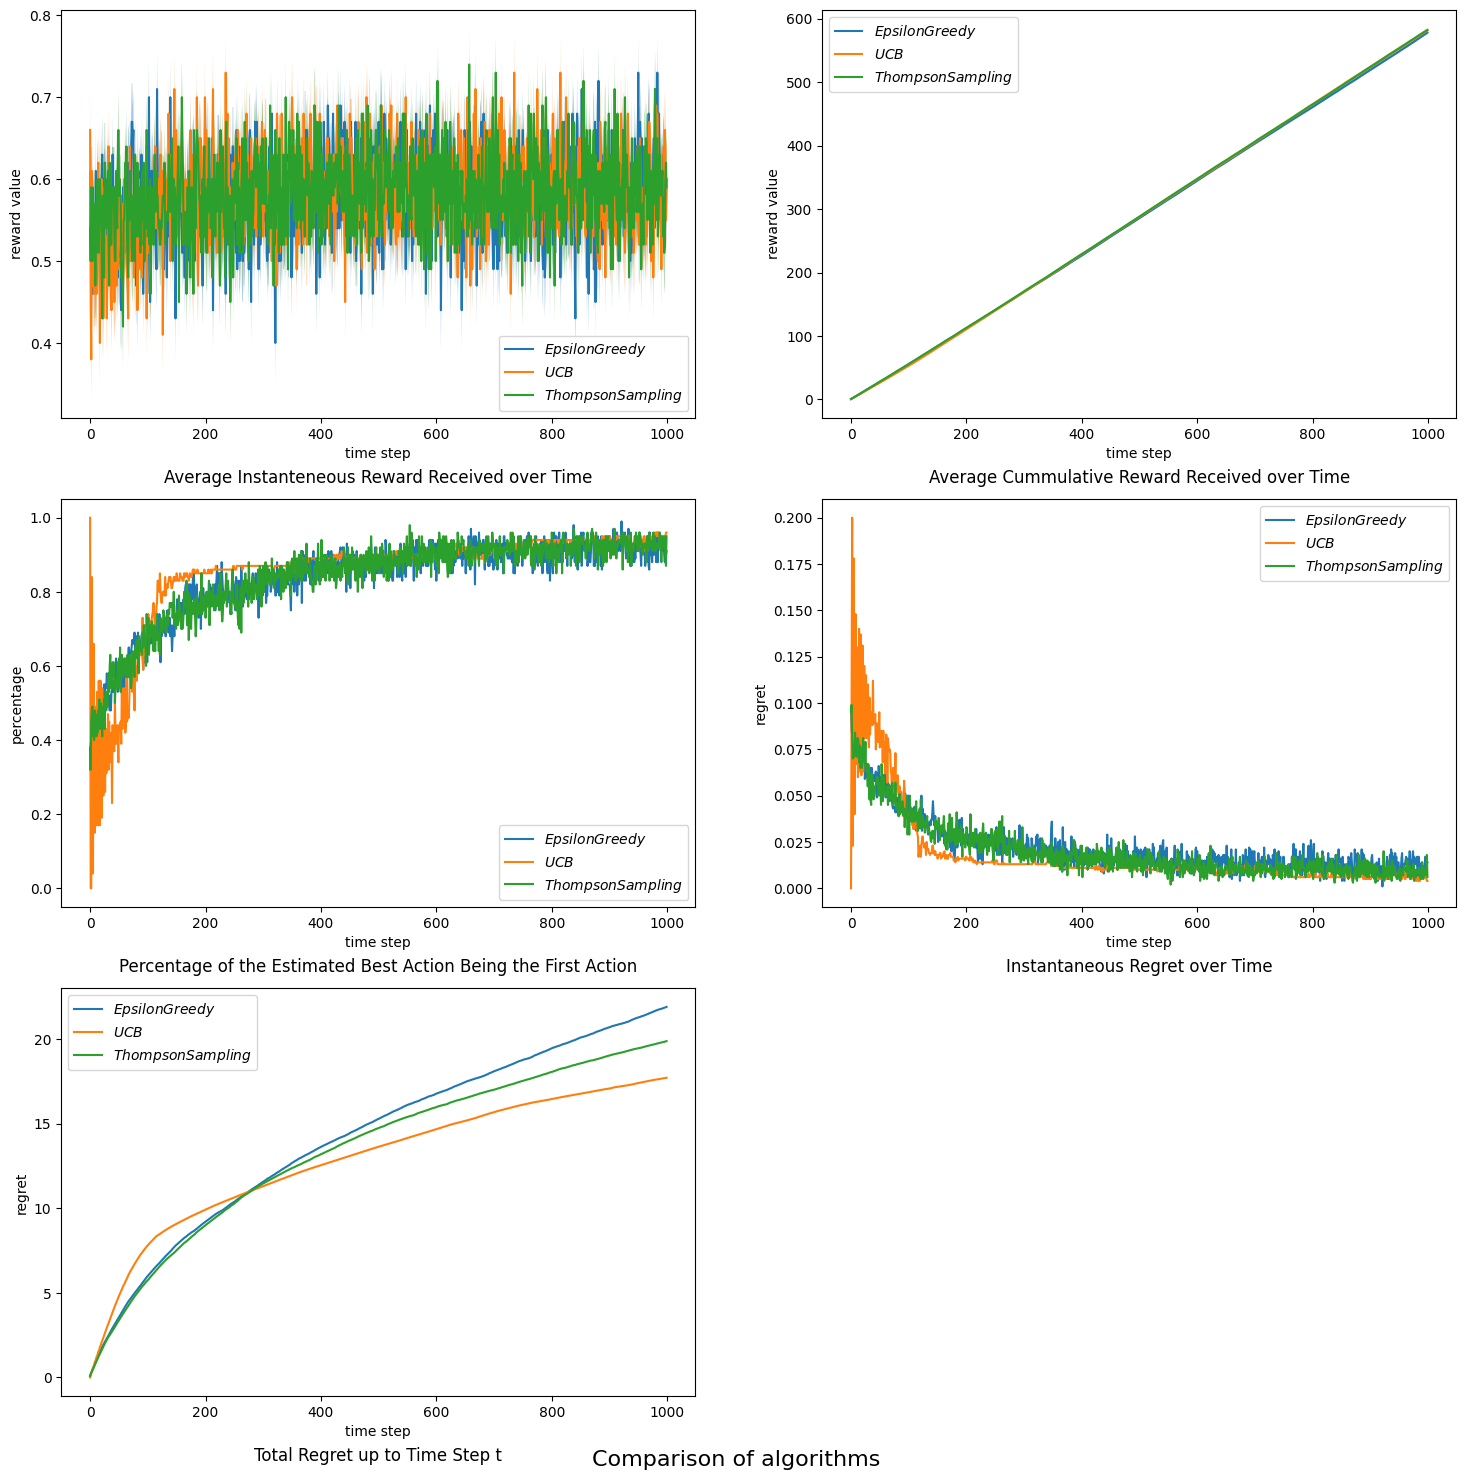

In [ ]:
algos = ["Epsilon Greedy", "UCB", "Thompson Sampling"]

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for algo in algos:

  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):
    if (algo == "Epsilon Greedy"):
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(three_arm_bernoulli_bandit, epsilon=0.125, alpha=None)
    elif (algo == "UCB"):
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = UCB(three_arm_bernoulli_bandit, c = 1, alpha=0.01)
    else:
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = Thompson_sampling(three_arm_bernoulli_bandit)

    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # plot the mean reward over time

  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

  axs[0,0].plot(mean_R_over_t_runs, label = r"$%s$" %algo)

  R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
  R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
  axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
  # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward value")
  axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

  # plot the mean cummulative reward over time

  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

  axs[0,1].plot(mean_total_R_over_t_runs, label = r"$%s$" %algo)

  total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
  total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
  axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("reward value")
  axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

  #plot the mean percentage of the estimated best action being the first action

  est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
  plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$%s$" %algo)

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("percentage")
  axs[1,0].set_title("Percentage of the Estimated Best Action Being the First Action", y=-0.18)

  #plot the mean instantaneous regret over time

  l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
  axs[1,1].plot(l_over_t_runs_avgs, label = r"$%s$" %algo)

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  #plot the total regret over time

  total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
  axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$%s$" %algo)

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = r'Comparison of algorithms'
fig.suptitle(title, fontsize=16, y=0.08)

plt.show()

### Answers

**Hyper-Parameter Selection Explanation:**
As each of the algorithms were tested and compared to each other with varying values (in Q5 and Q6), we simply took the parameters where the total regret up to Time Step "t" was the lowest (a lower total regret signifies better overall performance). Ideally, the instantaneous regret graph should also produce a ranking between the algorithms that matches the total regret graph. As more time steps are taken, we expect the instantaneous trend line to be closest to zero for the highest performing algorithm. We added an additional hyper-parameter testing in Q6 that helped us select its best hyper-parameter. Our choice of hyper-parameters is shown below:
1.   Epsilon Greedy: epsilon=0.125, alpha=averaging
2.   UCB: c = 1, alpha=0.01
3.   Thompson_sampling: No hyper-parameter selection needed

**Observation:**
Out of the three algorithms, each with the best hyper-parameter selected based on previous observations, it is seen that the UCB algorithm is the best one as it yields to the lowest total regret with the selected hyper-parameters. The other graphs support this observation as well, as on average, it has the lowest instantaneous regret, highest percentage of the estimated best action being the first action, and highest average cumulative reward received 1000 time steps. The epsilon greedy algorithm is the worst algorithm even with its optimized hyper-parameters selected.

## Q9 Non-stationary Environment

In [ ]:
#New class that I implemented
class NonStationaryBernoulliBandit:
  """
  A class for Non Stationary Bernoulli multi-armed bandit.

  Attributes
  ----------
  num_arms : int
      The number of arms in the bernoulli bandit
  probs_arr : array of integer (size num_arms)
      The binomial distribution parameter p_k (probability of drawing 1) of each arm indexed from 0
  change_point : int or None
      The time step at which the non-stationary changes occur. If None, there are no changes.
  delta : float
      The parameter used for updating probabilities after the change point.

  Methods
  -------
  sample(arm_index)
      Returns a reward sample of the binomial distribution indexed by the arm_index (return 0 with probability
      1-probs_arr[k] and 1 with probability probs_arr[k])
  """

  def __init__(self, num_arms, probs_arr, change_point, delta):
    self.num_arms = num_arms #My Code
    self.probs_arr = probs_arr #My Code
    self.change_point = change_point
    self.delta = delta

  def sample(self, arm_index, time_step):
    #My Code
    if self.change_point is not None and self.change_point == time_step: # set different probability array at step 500
      self.probs_arr = [0.5+delta,  0.5 + 2 * self.delta, 0.5 + 3 * self.delta]
    return np.random.binomial(n=1, p=self.probs_arr[int(arm_index)])

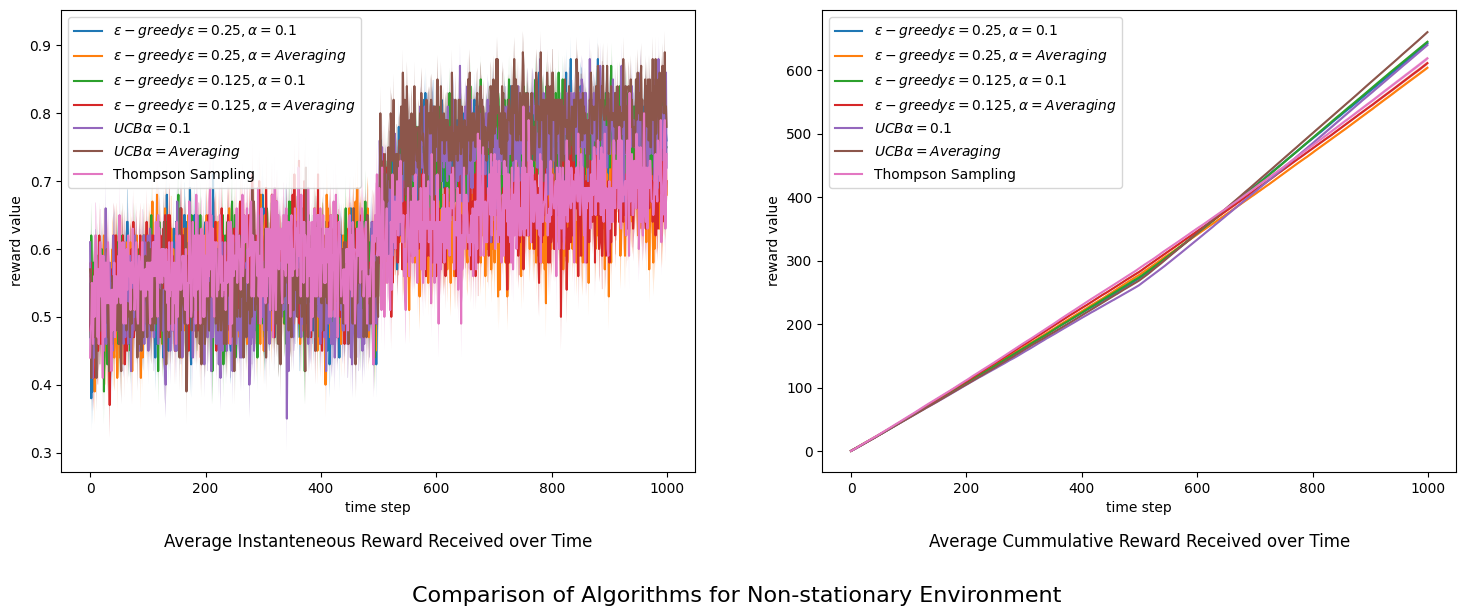

In [ ]:
hyperparameters = [[0.25, 0.1], [0.25, None], [0.125, 0.1], [0.125, None], [0.1], [None], []]

delta = 0.1
num_arms = 3
initial_probs = [0.5+delta, 0.5, 0.5-delta]
change_point = 500

epsilons = [1/4, 1/8]
alpha = 0.1
num_time_step = 1000

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for count in range(0, 7):

  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []
  for run in range(100):
    bandit_non_stationary = NonStationaryBernoulliBandit(num_arms, initial_probs, change_point, delta)
    if count <= 3:
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(bandit_non_stationary, epsilon=hyperparameters[count][0], alpha=hyperparameters[count][1])
      alpha = hyperparameters[count][1] if hyperparameters[count][1] is not None else "Averaging"
      label = r"$\epsilon -greedy  \epsilon = %s, \alpha = %s$" %(hyperparameters[count][0], alpha)
    elif count <= 5:
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = UCB(bandit_non_stationary, c = 2, alpha=hyperparameters[count][0])
      alpha = hyperparameters[count][0] if hyperparameters[count][0] is not None else "Averaging"
      label = r"$UCB \alpha = %s$" %(alpha)
    else:
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = Thompson_sampling(bandit_non_stationary)
      label = r"Thompson Sampling"

    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # plot the mean reward over time

  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

  axs[0].plot(mean_R_over_t_runs, label = label)

  R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
  R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
  axs[0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
  # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

  axs[0].legend()
  axs[0].set_xlabel("time step")
  axs[0].set_ylabel("reward value")
  axs[0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

  # plot the mean cummulative reward over time

  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

  axs[1].plot(mean_total_R_over_t_runs, label = label)

  total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
  total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
  axs[1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

  axs[1].legend()
  axs[1].set_xlabel("time step")
  axs[1].set_ylabel("reward value")
  axs[1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

# axs[-1].axis('off')

title = r'Comparison of Algorithms for Non-stationary Environment'
fig.suptitle(title, fontsize=16, y=-0.08)

plt.show()

### Answers

After 500 time steps, we observe that epsilon greedy (with epsilon=0.125 and alpha=0.1) and UCB (with alpha set to averaging) steeply increase in the average instantaneous reward and slightly increase in slope for average cumulative reward. This shows that these two algorithms, with specific hyperparameters, can effectively adapt to non-stationarity. Overall, UCB averaging performs the best. The other algorithms fail to adapt quickly, suggesting that they are unable to adapt to the new higher value arms.
